# Tasca M7 T01
Exercicis d'algoritmes de Classificació.

# Exercici 1
Crea almenys dos models de classificació diferents per intentar predir el millor les classes de l'arxiu adjunt.

In [273]:
# Importació de biblioteques
import os
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn import preprocessing
from sklearn import utils

#from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.linear_model import LogisticRegression  

from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score

In [197]:
filePath = r"C:\Formación\2022 BarcelonaActiva\CursDSOnline\Sprint07_ml_classificacio" + os.sep
file = filePath + "wineData.txt"
dfWine = pd.read_csv(file)
dfWine.head(4)

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [198]:
# Reanomeno les columnes del dataframe resultant més descriptives
dfWine.columns= ['class_id', 'alcohol', "malic_acid", "ash", "alcalinity_ash", "magnesium", "total_phenols", "flavanoids",
                 "nonflav_phenols", "cyanins", "color_intens", "hue", "diluted_wines", "proline"
                ]
dfWine.head(4)

,class_id,alcohol,malic_acid,ash,alcalinity_ash,magnesium,total_phenols,flavanoids,nonflav_phenols,cyanins,color_intens,hue,diluted_wines,proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [199]:
dfWine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   class_id         177 non-null    int64  
 1   alcohol          177 non-null    float64
 2   malic_acid       177 non-null    float64
 3   ash              177 non-null    float64
 4   alcalinity_ash   177 non-null    float64
 5   magnesium        177 non-null    int64  
 6   total_phenols    177 non-null    float64
 7   flavanoids       177 non-null    float64
 8   nonflav_phenols  177 non-null    float64
 9   cyanins          177 non-null    float64
 10  color_intens     177 non-null    float64
 11  hue              177 non-null    float64
 12  diluted_wines    177 non-null    float64
 13  proline          177 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


In [200]:
# Determinació de valors nuls
dfWine.isna().sum().sort_values()

class_id           0
alcohol            0
malic_acid         0
ash                0
alcalinity_ash     0
magnesium          0
total_phenols      0
flavanoids         0
nonflav_phenols    0
cyanins            0
color_intens       0
hue                0
diluted_wines      0
proline            0
dtype: int64

S'observa que totes les dades són numèriques contínues i no hi ha cap valor null.

In [201]:
# Dimensions del dataframe
dfWine.shape

(177, 14)

### - Divisió de dades en conjunts train i test

In [202]:
X_train, X_test, y_train, y_test = train_test_split(
                                        dfWine.drop('class_id', axis = 'columns'),
                                        dfWine['class_id'],
                                        train_size   = .7,               # 70% train i 30% test
                                        random_state = 4,
                                        shuffle      = True
                                    )                                                 

In [203]:
X_train

,alcohol,malic_acid,ash,alcalinity_ash,magnesium,total_phenols,flavanoids,nonflav_phenols,cyanins,color_intens,hue,diluted_wines,proline
28,14.02,1.68,2.21,16.0,96,2.65,2.33,0.26,1.98,4.70,1.04,3.59,1035
82,13.05,3.86,2.32,22.5,85,1.65,1.59,0.61,1.62,4.80,0.84,2.01,515
83,11.84,0.89,2.58,18.0,94,2.20,2.21,0.22,2.35,3.05,0.79,3.08,520
106,12.72,1.75,2.28,22.5,84,1.38,1.76,0.48,1.63,3.30,0.88,2.42,488
161,12.85,3.27,2.58,22.0,106,1.65,0.60,0.60,0.96,5.58,0.87,2.11,570
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,11.64,2.06,2.46,21.6,84,1.95,1.69,0.48,1.35,2.80,1.00,2.75,680
104,12.42,2.55,2.27,22.0,90,1.68,1.84,0.66,1.42,2.70,0.86,3.30,315
129,12.86,1.35,2.32,18.0,122,1.51,1.25,0.21,0.94,4.10,0.76,1.29,630
174,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835


In [204]:
X_test.head(4)

,alcohol,malic_acid,ash,alcalinity_ash,magnesium,total_phenols,flavanoids,nonflav_phenols,cyanins,color_intens,hue,diluted_wines,proline
162,12.96,3.45,2.35,18.5,106,1.39,0.70,0.40,0.94,5.28,0.68,1.75,675
141,13.52,3.17,2.72,23.5,97,1.55,0.52,0.50,0.55,4.35,0.89,2.06,520
14,13.63,1.81,2.70,17.2,112,2.85,2.91,0.30,1.46,7.30,1.28,2.88,1310
45,14.38,3.59,2.28,16.0,102,3.25,3.17,0.27,2.19,4.90,1.04,3.44,1065


In [205]:
y_train

28     1
82     2
83     2
106    2
161    3
      ..
87     2
104    2
129    3
174    3
122    2
Name: class_id, Length: 123, dtype: int64

In [206]:
y_test.head()

162    3
141    3
14     1
45     1
81     2
Name: class_id, dtype: int64

In [207]:
y_train.describe()

count    123.000000
mean       1.926829
std        0.759322
min        1.000000
25%        1.000000
50%        2.000000
75%        2.500000
max        3.000000
Name: class_id, dtype: float64

In [208]:
y_test.describe()

count    54.000000
mean      1.981481
std       0.812421
min       1.000000
25%       1.000000
50%       2.000000
75%       3.000000
max       3.000000
Name: class_id, dtype: float64

És important que la distribució de la variable resposta (variança/desviació estàndard) sigui semblant en el conjunt de train i en el de test, com es pot observar en aquest cas.

### - Preprocessat de dades: Escalat estàndard

In [209]:
sc = StandardScaler()

# Escalat del conjunt train
X_train_stand = sc.fit_transform(X_train)

# Escalat del conjunt train
X_test_stand = sc.transform(X_test)

In [210]:
# Visualització de dades X train escalades
X_train_stand

array([[ 1.28863377, -0.55494409, -0.50819265, ...,  0.324497  ,
         1.35824268,  0.96846784],
       [ 0.06686887,  1.27986118, -0.12363747, ..., -0.49930344,
        -0.85137462, -0.70152038],
       [-1.45718838, -1.21985058,  0.78531113, ..., -0.70525355,
         0.64501178, -0.6854628 ],
       ...,
       [-0.17244591, -0.83268984, -0.12363747, ..., -0.82882362,
        -1.85828882, -0.33219606],
       [ 0.34397019,  1.63335578, -0.33339484, ..., -1.529054  ,
        -1.480696  ,  0.32616468],
       [ 0.06686887,  2.91266954, -0.78786915, ..., -0.95239369,
         0.67298162, -1.13507501]])

In [211]:
# Visualització de dades X test escalades
X_test_stand

array([[-0.04649076,  0.93478313, -0.01875879, -0.31809848,  0.41126512,
        -1.57621786, -1.39530903,  0.31648275, -1.18772202,  0.10575044,
        -1.1583438 , -1.21498252, -0.18767785],
       [ 0.65885805,  0.69912007,  1.27474499,  1.11090492, -0.203135  ,
        -1.30811097, -1.57977276,  1.08579853, -1.88270891, -0.2838403 ,
        -0.29335333, -0.78145002, -0.6854628 ],
       [ 0.79740871, -0.44552909,  1.20482587, -0.68963937,  0.82086519,
         0.87025754,  0.86949573, -0.45283303, -0.26107283,  0.9519583 ,
         1.31305754,  0.36531339,  1.85163469],
       [ 1.74207229,  1.05261466, -0.26347572, -1.03260018,  0.1381984 ,
         1.54052477,  1.13594335, -0.68362776,  1.03980007, -0.05343717,
         0.324497  ,  1.14846888,  1.06481331],
       [-1.15489603, -1.01785367,  0.5405942 ,  1.25380526, -1.50020191,
        -0.55406033, -0.49348632,  0.31648275, -0.36799389, -1.18450709,
         1.43662761,  0.14155467, -0.33219606],
       [-0.688862  ,  0.581288

Les dades escalades tenen una distribució normal amb una mitjana de 0 i una desviació estàndard igual a 1.

### - Creació d'arbre de regressió*
* La variable resposta (class_id) es tracta d'un nombre, de manera que l'arbre de classificació dóna error i, per tant, utilitzo el model de regressió de l'arbre de decisió. Aquest codi no és una resposa a l'exercici, però ja que l'he fet el presento com a material extra.

In [212]:
# Creo l'objecte regresor de l'arbre de decisió
regressor = DecisionTreeRegressor(random_state=42)

# Ajusto l'objecte regressor amb les dades del conjunt entrenament
regressor = regressor.fit(X_train_stand, y_train)

# Faig les prediccions de la variable resposta amb el conjunt de prova
y_pred_dt = regressor.predict(X_test_stand)

In [213]:
print("Les prediccions de 'class_id' són:\n", y_pred_dt)

Les prediccions de 'class_id' són:
 [3. 3. 1. 1. 2. 3. 1. 2. 1. 2. 2. 1. 3. 3. 1. 2. 1. 2. 2. 3. 3. 3. 2. 3.
 1. 2. 3. 2. 3. 3. 1. 2. 1. 2. 3. 2. 1. 1. 1. 3. 3. 1. 1. 2. 2. 1. 2. 1.
 1. 3. 2. 2. 2. 1.]


In [214]:
# Avaluació del model
print("La puntuació R2:",regressor.score(X_train_stand, y_train))

La puntuació R2: 1.0


In [215]:
# Accuracy és del objecte classificador
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_dt)) 

Accuracy: 0.9074074074074074


### - Classificació usant model de regressió logística

In [216]:
# Converteixo els valors continus de la variable resposta en valors categòrics, usant la funció LabelEncoder() 
# i així evitar l'error "ValueError: Unknown label type: 'continuous'"
lab = preprocessing.LabelEncoder()
y_train_cat_lr = lab.fit_transform(y_train)
y_train_cat_lr

array([0, 1, 1, 1, 2, 2, 0, 2, 1, 1, 1, 0, 2, 1, 1, 0, 1, 1, 1, 0, 1, 2,
       0, 0, 1, 1, 2, 2, 2, 1, 0, 0, 2, 0, 0, 1, 0, 1, 0, 1, 2, 1, 1, 1,
       1, 1, 1, 0, 2, 2, 2, 1, 1, 0, 0, 1, 0, 0, 0, 1, 2, 2, 1, 0, 2, 1,
       2, 0, 2, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 2, 2, 0, 1, 0, 2, 1, 2, 1,
       1, 1, 1, 0, 2, 0, 2, 1, 0, 2, 0, 1, 0, 2, 0, 0, 2, 0, 1, 0, 0, 2,
       0, 0, 1, 1, 1, 1, 2, 0, 1, 1, 2, 2, 1], dtype=int64)

In [217]:
lr = LogisticRegression().fit(X_train_stand, y_train_cat_lr)  
y_pred_lr = lr.predict(X_test_stand)
print("Les prediccions de 'class_id' són:\n", y_pred_lr)

Les prediccions de 'class_id' són:
 [2 2 0 0 1 2 0 1 0 1 1 0 2 2 0 1 0 1 1 2 1 2 1 2 0 1 1 1 2 2 0 1 0 1 2 2 0
 0 0 2 2 0 0 1 1 0 1 2 0 2 1 1 1 0]


In [218]:
# Converteixo els valors continus de la variable resposta en categòrics
lab = preprocessing.LabelEncoder()
y_test_cat_lr = lab.fit_transform(y_test)
y_test_cat_lr #Valors categòrics

array([2, 2, 0, 0, 1, 2, 0, 1, 0, 1, 1, 0, 2, 2, 0, 1, 0, 1, 1, 2, 1, 2,
       1, 2, 0, 2, 1, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 0, 0, 2, 2, 0, 0, 1,
       1, 0, 1, 2, 0, 2, 1, 1, 1, 0], dtype=int64)

### - Classificació usant KNN
En aquest cas, vull classificar els valors de malic_acid en grups, així que faré prediccions dels grups.

In [219]:
# Preprocessat de dades per a la classificació

# Creo 2 classes i les assigno a "class_id_cat"
dfWine["class_id_cat"] = pd.qcut(dfWine["class_id"], 2, retbins=False, labels=[0, 1])
y = dfWine["class_id_cat"]
X = dfWine.drop(["class_id", "class_id_cat"], axis = 1)

In [220]:
y

0      0
1      0
2      0
3      0
4      0
      ..
172    1
173    1
174    1
175    1
176    1
Name: class_id_cat, Length: 177, dtype: category
Categories (2, int64): [0 < 1]

In [221]:
X.head(3)

,alcohol,malic_acid,ash,alcalinity_ash,magnesium,total_phenols,flavanoids,nonflav_phenols,cyanins,color_intens,hue,diluted_wines,proline
0,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480


In [222]:
# Divisió de dades en conjunts train i test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [223]:
X_train

,alcohol,malic_acid,ash,alcalinity_ash,magnesium,total_phenols,flavanoids,nonflav_phenols,cyanins,color_intens,hue,diluted_wines,proline
128,12.04,4.30,2.38,22.0,80,2.10,1.75,0.42,1.35,2.60,0.79,2.57,580
104,12.42,2.55,2.27,22.0,90,1.68,1.84,0.66,1.42,2.70,0.86,3.30,315
78,12.70,3.87,2.40,23.0,101,2.83,2.55,0.43,1.95,2.57,1.19,3.13,463
36,13.05,1.65,2.55,18.0,98,2.45,2.43,0.29,1.44,4.25,1.12,2.51,1105
93,11.62,1.99,2.28,18.0,98,3.02,2.26,0.17,1.35,3.25,1.16,2.96,345
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,13.49,1.66,2.24,24.0,87,1.88,1.84,0.27,1.03,3.74,0.98,2.78,472
106,12.72,1.75,2.28,22.5,84,1.38,1.76,0.48,1.63,3.30,0.88,2.42,488
14,13.63,1.81,2.70,17.2,112,2.85,2.91,0.30,1.46,7.30,1.28,2.88,1310
92,12.29,2.83,2.22,18.0,88,2.45,2.25,0.25,1.99,2.15,1.15,3.30,290


In [224]:
y_test.head()

19     0
45     0
139    1
30     0
67     0
Name: class_id_cat, dtype: category
Categories (2, int64): [0 < 1]

In [225]:
# Escalat estàndard de les característiques per a la classificació
sc = StandardScaler()
sc.fit(X_train)

X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

In [226]:
# Entrenament i predicció per a la classificació
classifier = KNeighborsClassifier()   #Com no hi ha cap argument, usarà 5 veïns per defecte 
classifier.fit(X_train_sc, y_train)

KNeighborsClassifier()

In [227]:
# Prediccions de les classes del malic_acid del conjunt de dades test
y_pred_knn = classifier.predict(X_test_sc)
print("Les prediccions de les classes de malic_acid són:\n", y_pred_knn)

Les prediccions de les classes de malic_acid són:
 [0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 1
 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1]


### - Classificació usant Support Vector Machines (SVM)
Usant aquest model vull predir els valors de la variable malic_acid.

In [228]:
dfWine.head(4)

,class_id,alcohol,malic_acid,ash,alcalinity_ash,magnesium,total_phenols,flavanoids,nonflav_phenols,cyanins,color_intens,hue,diluted_wines,proline,class_id_cat
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


In [229]:
dfWine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   class_id         177 non-null    int64   
 1   alcohol          177 non-null    float64 
 2   malic_acid       177 non-null    float64 
 3   ash              177 non-null    float64 
 4   alcalinity_ash   177 non-null    float64 
 5   magnesium        177 non-null    int64   
 6   total_phenols    177 non-null    float64 
 7   flavanoids       177 non-null    float64 
 8   nonflav_phenols  177 non-null    float64 
 9   cyanins          177 non-null    float64 
 10  color_intens     177 non-null    float64 
 11  hue              177 non-null    float64 
 12  diluted_wines    177 non-null    float64 
 13  proline          177 non-null    int64   
 14  class_id_cat     177 non-null    category
dtypes: category(1), float64(11), int64(3)
memory usage: 19.8 KB


In [230]:
# Divisió de dades en conjunts train i test
X_train, X_test, y_train, y_test = train_test_split(
                                        dfWine.drop('class_id', axis = 'columns'),
                                        dfWine['class_id'],
                                        train_size=.7,               # 70% train i 30% test
                                        random_state=42,
                                    #    stratify=y
                                        shuffle=True
                                    )                                                 

In [231]:
y_train

128    2
104    2
78     2
36     1
93     2
      ..
71     2
106    2
14     1
92     2
102    2
Name: class_id, Length: 123, dtype: int64

In [232]:
# Escalat estàndard de les característiques per a la classificació
sc = StandardScaler()
sc.fit(X_train)

X_train_sc_svm = sc.transform(X_train)
X_test_sc_svm = sc.transform(X_test)

In [234]:
# Converteixo els valors continus de la variable resposta en valors categòrics, usant la funció LabelEncoder() 
# i així evitar l'error "ValueError: Unknown label type: 'continuous'"
lab = preprocessing.LabelEncoder()
y_train_cat_svm = lab.fit_transform(y_train)
y_train_cat_svm

array([1, 1, 1, 0, 1, 0, 2, 1, 1, 2, 0, 0, 0, 2, 0, 0, 1, 2, 1, 0, 2, 1,
       0, 2, 1, 1, 0, 1, 0, 0, 1, 0, 0, 2, 1, 1, 1, 0, 1, 1, 1, 2, 2, 0,
       1, 2, 2, 1, 1, 0, 1, 2, 2, 1, 2, 1, 1, 1, 0, 0, 2, 0, 2, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 2, 1, 1, 1, 2, 2, 1, 0, 0, 1, 2, 2, 0, 1, 2, 2,
       2, 2, 1, 0, 1, 0, 2, 1, 0, 1, 0, 0, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 0, 1, 1], dtype=int64)

In [235]:
clf = SVC(kernel='linear')

# Ajusto el model usant els conjunts train
clf.fit(X_train_sc_svm, y_train_cat_svm)

# Predicció dels valors (categòrics) de la variable resposta "malic_acid" en el conjunt prova 
y_pred_svm = clf.predict(X_test_sc_svm)

In [236]:
print("Les prediccions de 'class_id' són:\n", y_pred_svm)

Les prediccions de 'class_id' són:
 [0 0 2 0 0 0 1 2 1 2 0 2 0 1 0 1 1 1 0 1 0 1 1 2 2 2 1 1 1 0 0 1 2 0 0 0 2
 2 1 2 0 1 1 1 2 0 1 1 2 0 1 0 0 2]


# Exercici 2
Compara els models de classificació utilitzant la precisió (accuracy), una matriu de confusió i d’altres mètriques més
avançades.

In [237]:
# Importació de biblioteques
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.preprocessing import LabelBinarizer

### - Avaluació del model regressió logística

In [240]:
# Càlcul de Accuracy (exactitud)
# Importo el módul scikit-learn metrics per calcular Accuracy

print("L'accuracy (regressió logística) és:", metrics.accuracy_score(y_test_cat_lr, y_pred_lr))

L'accuracy (regressió logística) és: 0.9814814814814815


L'accuracy per regressió logística és 98,1%

In [241]:
# Determinació de matriu de confusió

y_test_cat_lr
y_pred_lr
c_matrix_lr = confusion_matrix(y_test_cat_lr, y_pred_lr)
print(c_matrix_lr)

[[18  0  0]
 [ 0 19  0]
 [ 0  1 16]]


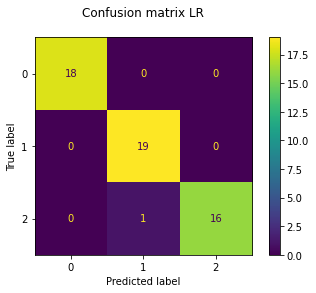

In [242]:
# Traçat de la matriu de confusió a partir dels valors de la variable resposta reals i predits
c_matrix_lr = ConfusionMatrixDisplay.from_predictions(y_test_cat_lr, y_pred_lr)
plt.title("Confusion matrix LR\n")
plt.show()

In [243]:
X_test_stand

array([[-0.04649076,  0.93478313, -0.01875879, -0.31809848,  0.41126512,
        -1.57621786, -1.39530903,  0.31648275, -1.18772202,  0.10575044,
        -1.1583438 , -1.21498252, -0.18767785],
       [ 0.65885805,  0.69912007,  1.27474499,  1.11090492, -0.203135  ,
        -1.30811097, -1.57977276,  1.08579853, -1.88270891, -0.2838403 ,
        -0.29335333, -0.78145002, -0.6854628 ],
       [ 0.79740871, -0.44552909,  1.20482587, -0.68963937,  0.82086519,
         0.87025754,  0.86949573, -0.45283303, -0.26107283,  0.9519583 ,
         1.31305754,  0.36531339,  1.85163469],
       [ 1.74207229,  1.05261466, -0.26347572, -1.03260018,  0.1381984 ,
         1.54052477,  1.13594335, -0.68362776,  1.03980007, -0.05343717,
         0.324497  ,  1.14846888,  1.06481331],
       [-1.15489603, -1.01785367,  0.5405942 ,  1.25380526, -1.50020191,
        -0.55406033, -0.49348632,  0.31648275, -0.36799389, -1.18450709,
         1.43662761,  0.14155467, -0.33219606],
       [-0.688862  ,  0.581288

In [244]:
# Corba ROC, esquema One vs Rest

label_binarizer = LabelBinarizer().fit(y_train_cat_lr)
y_onehot_test = label_binarizer.transform(y_test_cat_lr)
y_onehot_test.shape   # (n_mostres, n_classes)

(54, 3)

In [245]:
label_binarizer.transform([1])

array([[0, 1, 0]])

In [246]:
class_of_interest = 1
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

1

In [247]:
# Dibuix de la corba ROC
RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_pred_lr[:, class_id],
    name=f"{class_of_interest} vs the rest",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves:\nVirginica vs (reducedFlights.csvest)")
plt.legend()
plt.show()   # Hauria de dibuixar la corba ROC

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

### - Avaluació del model KNN

In [248]:
# Càlcul de Accuracy (exactitud)
# Preprocessat de dades per a la classificació

# Creo 4 classes i les assigno a "malic_acid_cat"
dfWine["class_id_cat"] = pd.qcut(dfWine["class_id"], 2, retbins=False, labels=[0, 1])
y = dfWine["class_id_cat"]
X = dfWine.drop(["class_id", "class_id_cat"], axis = 1)

In [108]:
# Divisió de dades en conjunts train i test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [109]:
# Escalat estàndard de les característiques per a la classificació
sc = StandardScaler()
sc.fit(X_train)
X_train_sc_knn = sc.transform(X_train)
X_test_sc_knn = sc.transform(X_test)

In [110]:
# Entrenament i predicció per a la classificació
classifier = KNeighborsClassifier()   #Com no hi ha cap argument, usarà 5 veïns per defecte 
classifier.fit(X_train_sc_knn, y_train)

KNeighborsClassifier()

In [111]:
# Prediccions de les classes del malic_acid del conjunt de dades test 
y_pred_knn = classifier.predict(X_test_sc_knn)
y_pred_knn

array([0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1], dtype=int64)

In [112]:
# Converteixo els valors continus de la variable resposta (y_test) en valors categòrics, usant la funció LabelEncoder()
# i així evitar l'error "ValueError: Classification metrics can't handle a mix of continuous and multiclass targets"
lab = preprocessing.LabelEncoder()
y_test_cat_knn = lab.fit_transform(y_test)
y_test_cat_knn

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1], dtype=int64)

In [113]:
print("L'accuracy (KNN) és:", metrics.accuracy_score(y_test_cat_knn, y_pred_knn))

L'accuracy (KNN) és: 0.9444444444444444


L'Accuracy per a KNN és 94,4%

In [114]:
# Determinació de matriu de confusió

c_matrik_knn = confusion_matrix(y_test_cat_knn, y_pred_knn)
print(c_matrik_knn)

[[37  3]
 [ 0 14]]


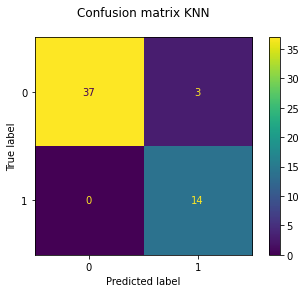

In [115]:
# Traçat de la matriu de confusió a partir dels valors de la variable resposta reals i predits
c_matrix_knn = ConfusionMatrixDisplay.from_predictions(y_test_cat_knn, y_pred_knn)
plt.title("Confusion matrix KNN\n")
plt.show()

In [120]:
# Corba ROC, esquema One vs Rest

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape   # (n_mostres, n_classes)

(54, 1)

In [121]:
label_binarizer.transform([1])

array([[1]])

In [122]:
class_of_interest = 1
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

1

In [129]:
# Dibuix de la corba ROC
RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_pred_knn[:, class_id],
    name=f"{class_of_interest} vs the rest",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves:\n2 vs (reducedFlights.csvest)")
plt.legend()
plt.show() 

# Hauria de dibuixar la corba ROC

IndexError: index 1 is out of bounds for axis 1 with size 1

### - Avaluació del model SVM

In [132]:
dfWine.head(4)

,class_id,alcohol,malic_acid,ash,alcalinity_ash,magnesium,total_phenols,flavanoids,nonflav_phenols,cyanins,color_intens,hue,diluted_wines,proline,class_id_cat
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


In [133]:
# Divisió de dades en conjunts train i test
X_train, X_test, y_train, y_test = train_test_split(
                                        dfWine.drop('class_id', axis = 'columns'),
                                        dfWine['class_id'],
                                        train_size=.7,               # 70% train i 30% test
                                        random_state=42,
                                    #    stratify=y
                                        shuffle=True
                                    )                                                 

In [134]:
y_test 

19     1
45     1
139    3
30     1
67     2
16     1
119    2
173    3
109    2
140    3
24     1
161    3
41     1
118    2
15     1
111    2
113    2
82     2
9      1
114    2
18     1
66     2
60     2
168    3
170    3
150    3
117    2
65     2
90     2
55     1
29     1
127    2
144    3
31     1
12     1
42     1
156    3
136    3
98     2
158    3
38     1
108    2
85     2
68     2
142    3
2      1
100    2
122    2
153    3
51     1
76     2
56     1
26     1
152    3
Name: class_id, dtype: int64

In [135]:
# Converteixo els valors continus de la variable resposta en valors categòrics, usant la funció LabelEncoder()
# i així evitar un error.
lab = preprocessing.LabelEncoder()
y_test_cat_svm = lab.fit_transform(y_test)
y_test_cat_svm

array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 1, 1,
       2, 0, 1, 1, 2, 0, 1, 0, 0, 2], dtype=int64)

In [136]:
y_pred_svm

array([0, 0, 2, 0, 0, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 1, 1,
       2, 0, 1, 1, 2, 0, 1, 0, 0, 2], dtype=int64)

In [137]:
# Càlcul de Accuracy (exactitud)
print("Accuracy (SVM):",metrics.accuracy_score(y_test_cat_svm, y_pred_svm))

Accuracy (SVM): 0.9814814814814815


L'accuracy de la classificació usant SVM és de 98,2%

In [138]:
# Determinació de matriu de confusió

y_test_cat_svm
y_pred_svm
c_matrix_svm = confusion_matrix(y_test_cat_svm, y_pred_svm)
print(c_matrix_svm)

[[19  0  0]
 [ 1 20  0]
 [ 0  0 14]]


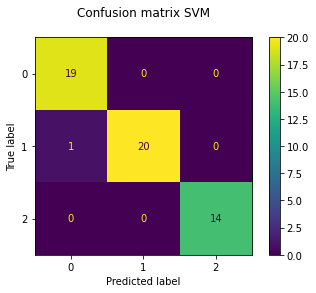

In [139]:
# Traçat de la matriu de confusió a partir dels valors de la variable resposta reals i predits
c_matrix_svm = ConfusionMatrixDisplay.from_predictions(y_test_cat_svm, y_pred_svm)
plt.title("Confusion matrix SVM\n")
plt.show()

In [140]:
# Corba ROC, esquema One vs Rest

label_binarizer = LabelBinarizer().fit(y_train_cat_svm)
y_onehot_test = label_binarizer.transform(y_test_cat_svm)
y_onehot_test.shape   # (n_mostres, n_classes)

(54, 3)

In [145]:
label_binarizer.transform([2])  # Valor numèric de la variable y_test_cat_svm

array([[0, 0, 1]])

In [150]:
class_of_interest = 2
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

2

In [151]:
# Dibuix de la corba ROC
RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_pred_svm[:, class_id],
    name=f"{class_of_interest} vs the rest",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves:\n2 vs (reducedFlights.csvest)")
plt.legend()
plt.show() 
# Hauria de dibuixar la corba ROC

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

# Exercici 3
Entrena’ls usant els diferents paràmetres que admeten per tal de millorar-ne la predicció.

### - Regressió logística

In [170]:
# Valors categòrics de la variable resposta del conjunt train
y_train_cat_lr

array([0, 1, 1, 1, 2, 2, 0, 2, 1, 1, 1, 0, 2, 1, 1, 0, 1, 1, 1, 0, 1, 2,
       0, 0, 1, 1, 2, 2, 2, 1, 0, 0, 2, 0, 0, 1, 0, 1, 0, 1, 2, 1, 1, 1,
       1, 1, 1, 0, 2, 2, 2, 1, 1, 0, 0, 1, 0, 0, 0, 1, 2, 2, 1, 0, 2, 1,
       2, 0, 2, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 2, 2, 0, 1, 0, 2, 1, 2, 1,
       1, 1, 1, 0, 2, 0, 2, 1, 0, 2, 0, 1, 0, 2, 0, 0, 2, 0, 1, 0, 0, 2,
       0, 0, 1, 1, 1, 1, 2, 0, 1, 1, 2, 2, 1], dtype=int64)

In [249]:
# Us de GridSearchCV per ajustar els hiperparámetres

# Creo la quadrícula de paràmetres
parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}

In [250]:
lr = LogisticRegression()
clf = GridSearchCV(lr,                        # model
                   param_grid = parameters,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=10)                     # number of folds

In [251]:
# Entrenament de l'instància clf 
clf.fit(X_train_stand, y_train_cat_lr)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [252]:
print("Hiperparàmetres sintonitzats:", clf.best_params_) 
print("Precisió entrenament:",clf.best_score_)

Hiperparàmetres sintonitzats: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
Precisió entrenament: 0.9923076923076923


In [256]:
# Construeixo el nou model amb el hiperparàmetres ajustats que retorna la funció GridSearchCV()

lr_grid = LogisticRegression(C = 0.1, 
                            penalty = 'l2', 
                            solver = 'newton-cg')
lr_grid.fit(X_train_stand, y_train_cat_lr)
y_pred_lr_grid = lr_grid.predict(X_test_stand)
y_pred_lr_grid

array([2, 2, 0, 0, 1, 2, 0, 1, 0, 1, 1, 0, 2, 2, 0, 1, 0, 1, 1, 2, 1, 2,
       1, 2, 0, 2, 1, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 0, 0, 2, 2, 0, 0, 1,
       1, 0, 1, 2, 0, 2, 1, 1, 1, 0], dtype=int64)

In [257]:
print("Accuracy (regressió logística-GSCV):",lr_grid.score(X_test_stand, y_test_cat_lr))  # Aquest codi dóna igual que "metrics.accuracy_score(y_test_cat_lr, y_pred_lr_grid)"

Accuracy (regressió logística-GSCV): 1.0


El nou model de regressió logística dona millors resultats ja que presenta una precisió de 100%, vers el 98,1% de l'anterior.

### - Model KNN

In [258]:
# Us de GridSearchCV per ajustar els hiperparámetres

# Creació de la instància knn
knn = KNeighborsClassifier()
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)

In [259]:
# Definció del rang dels paràmetres
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# Entrenament del model per la cerca en quadrícula
grid_search=grid.fit(X_train_sc_knn, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


In [264]:
# Cerca del paràmetre òptim de K y la millor accuracy a través de GridSearchCV
print("Paràmetre òptim de K:", grid_search.best_params_)
accuracy = grid_search.best_score_ *100
print("Accuracy pel conjunt d'entrenament: {:.3f}%".format(accuracy))

Paràmetre òptim de K: {'n_neighbors': 21}
Accuracy pel conjunt d'entrenament: 97.564%


In [265]:
# Ajusto el model KNN amb el millor hiperparàmetre K
knn = KNeighborsClassifier(n_neighbors=21)

knn.fit(X_train_sc, y_train)
y_pred_knn_grid = knn.predict(X_test_sc_knn) 
y_pred_knn_grid

array([1, 1, 3, 1, 2, 1, 2, 3, 2, 3, 1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 2,
       3, 3, 3, 3, 3, 2, 2, 1, 1, 2, 3, 1, 1, 1, 3, 3, 2, 3, 1, 2, 2, 2,
       3, 1, 2, 2, 3, 1, 2, 1, 1, 3], dtype=int64)

In [270]:
y_test_cat_knn

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1], dtype=int64)

In [279]:
print("Accuracy (KNN-GSCV) és:", metrics.accuracy_score(y_test, y_pred_knn_grid))

Accuracy (KNN-GSCV) és: 0.9444444444444444


In [278]:
accuracy = accuracy_score(y_test, y_pred_knn_grid)*100
print("Accuracy del conjunt dades de prova (KNN-GSCV): {:.3f}%".format(accuracy))

Accuracy del conjunt dades de prova (KNN-GSCV): 94.444%


El nou model de KNN presenta una precisió de 94,4%, igual que la del KNN inicial.


# Exercici 4
Compara el seu rendiment fent servir l’aproximació traint/test o cross-validation.

Fet en el exerici 3, al utilitzar la funció GridSearchCV per ajustar els paràmetres es realitza la validació creuada. 

# Exercici 5
Aplica algun procés d'enginyeria per millorar els resultats (normalització, estandardització, mostreig...)

En l'exercici 1 realitzo el preprocessat de les dades, concretament, l'escalat estàndard.